# Import libraries and download dataset

In [850]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [851]:
#https://www.kaggle.com/datasets/mssmartypants/water-quality
water = pd.read_csv('waterQuality.csv')

In [852]:
water

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [853]:
water.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [854]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Data Preprocessing

In [855]:
water[water['ammonia']=='#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [856]:
water = water.drop(labels=[7551,7568,7890],axis=0)

In [857]:
water[water['ammonia']=='#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


In [858]:
water['ammonia'] = water['ammonia'].astype(float)
water['is_safe'] = water['is_safe'].astype(int)

In [859]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [860]:
water.head(16)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.040,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.010,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.040,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.040,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.030,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.030,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.60,0.010,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.040,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.010,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.020,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


# Data Visualisation 

In [861]:
print(columns_names)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']


In [862]:
columns_names = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe']

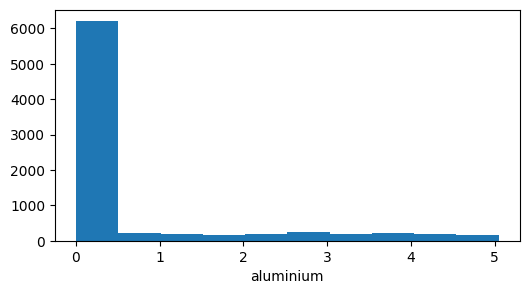

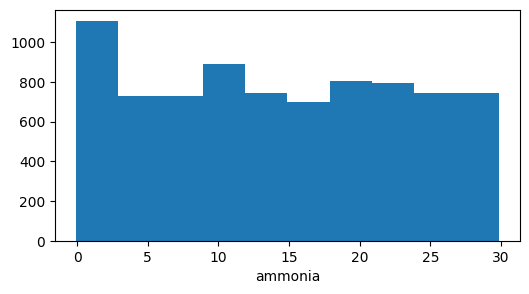

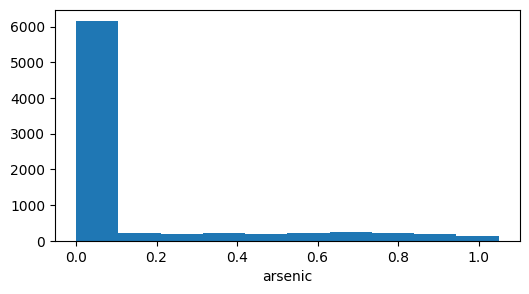

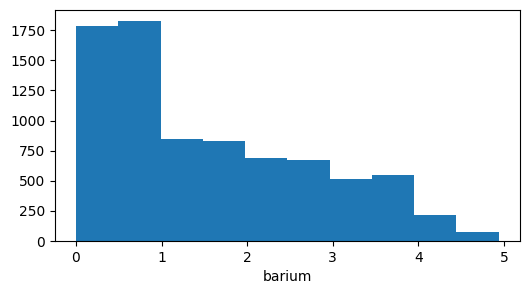

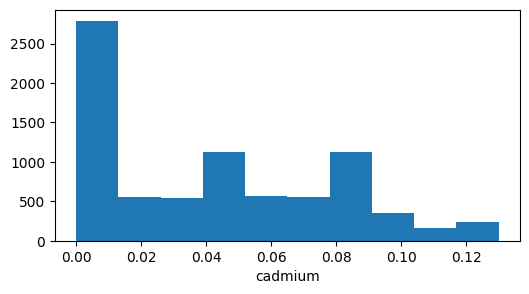

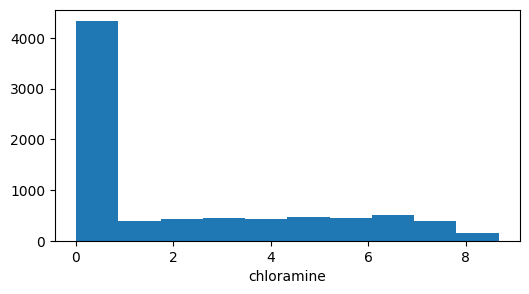

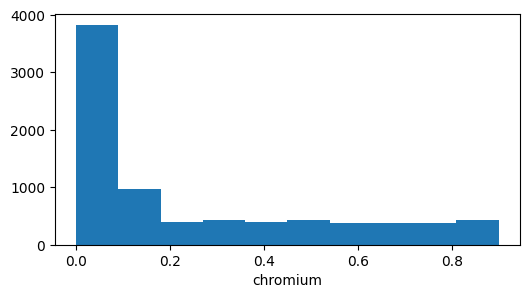

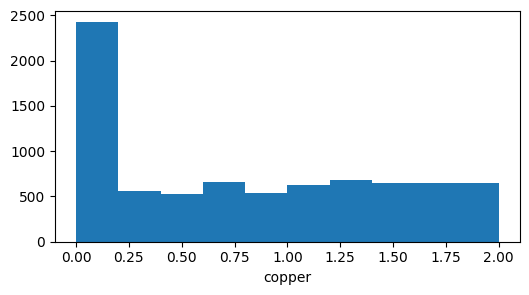

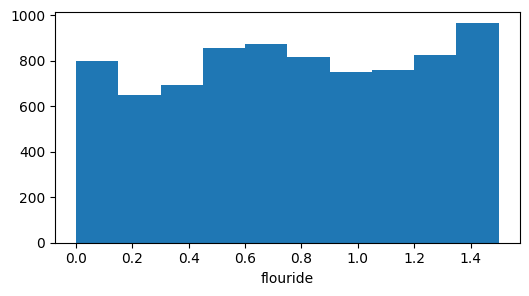

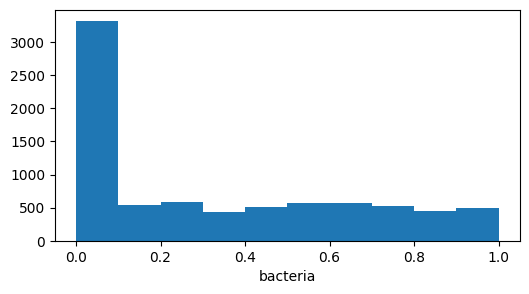

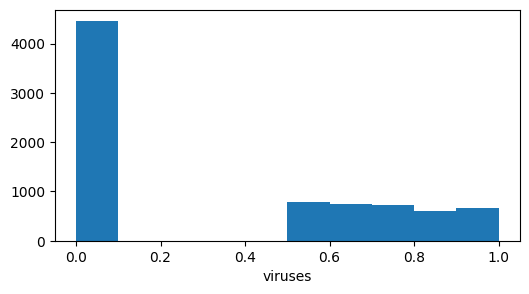

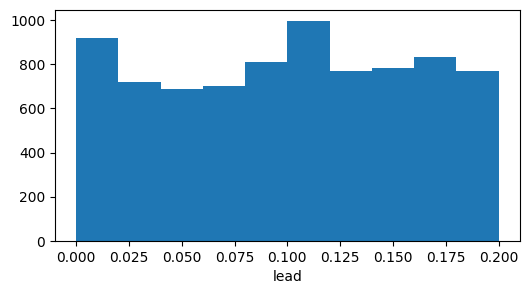

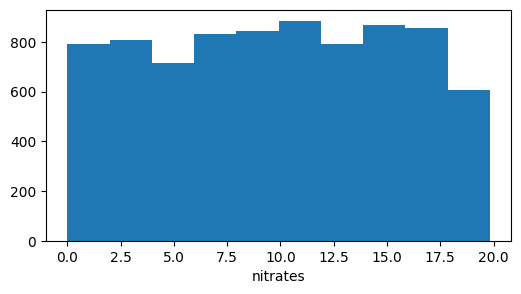

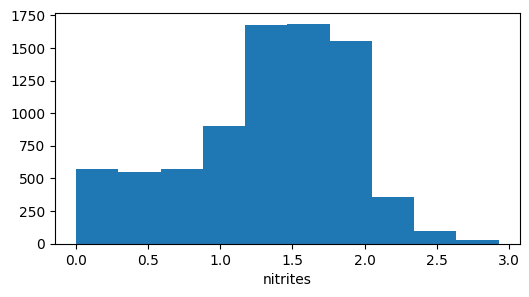

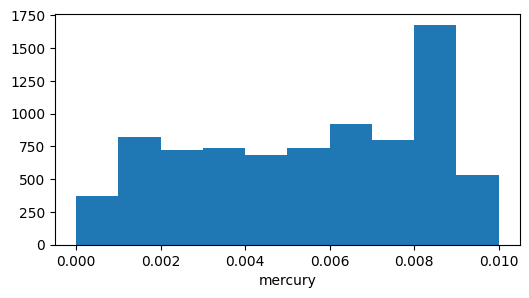

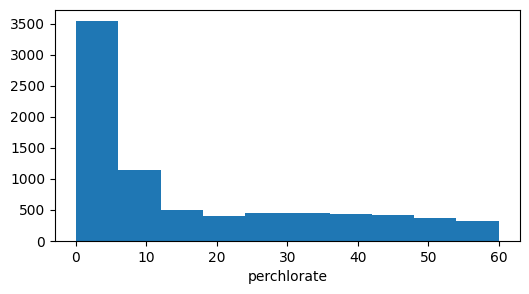

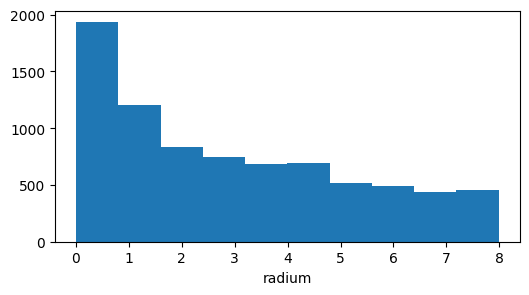

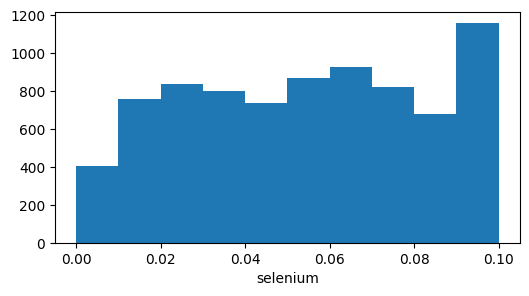

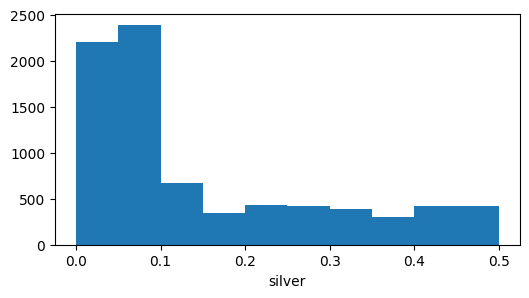

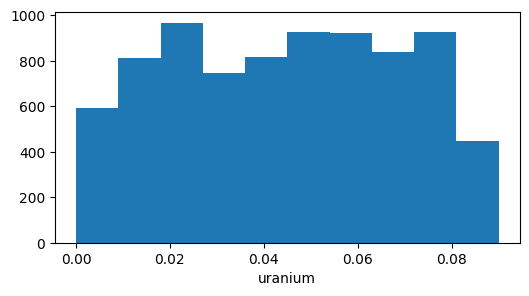

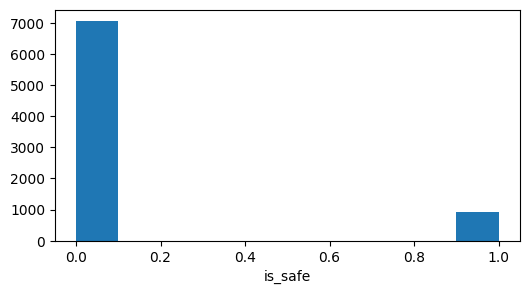

In [863]:
for column in columns_names:
    plt.figure(figsize=(6,3))
    plt.hist(water[column])
    plt.xlabel(column)
    plt.show()

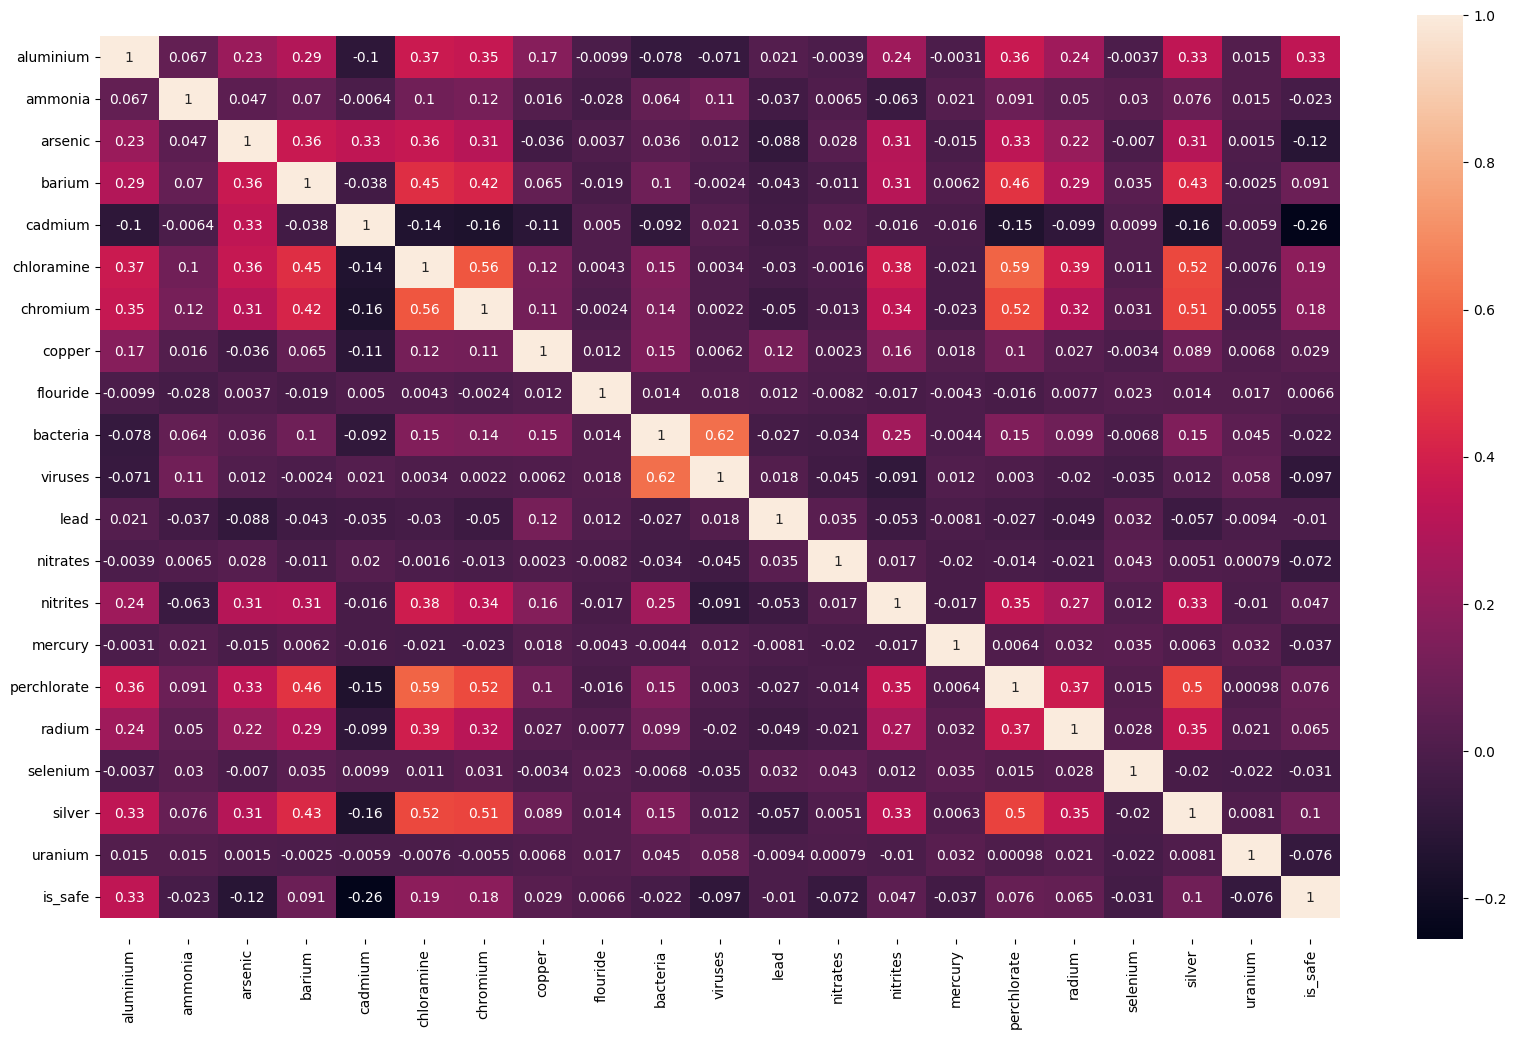

In [864]:
correlation = water.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(correlation, annot=True, fmt= '.2g')
i, j = ax.get_ylim()
ax.set_ylim(i + 0.5, j - 0.5)
plt.show()

In [865]:
good_features = ['aluminium', 'cadmium','chloramine','chromium','uranium','silver','perchlorate']

## Boxplots

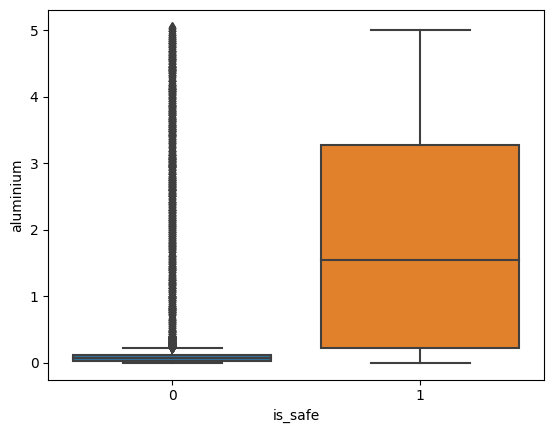

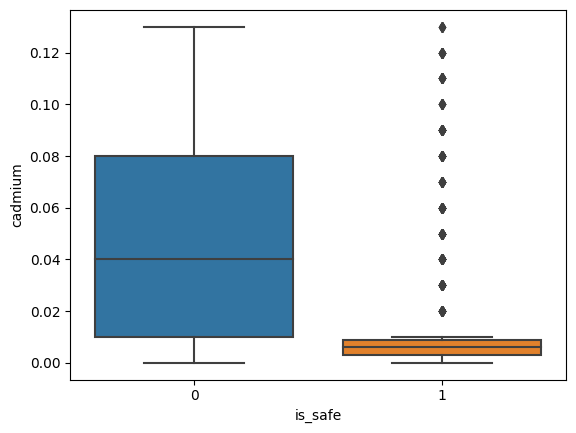

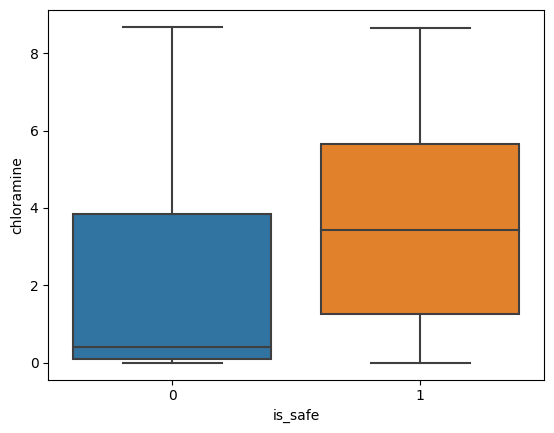

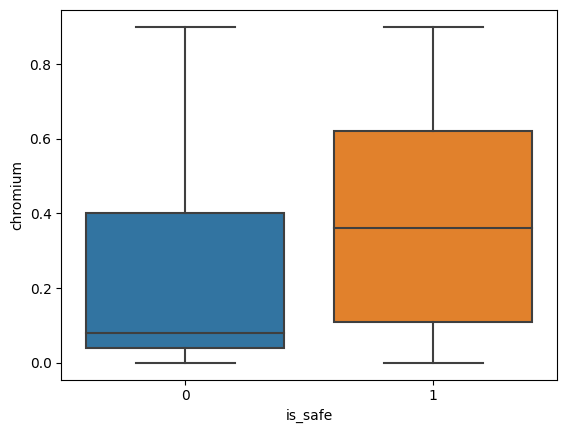

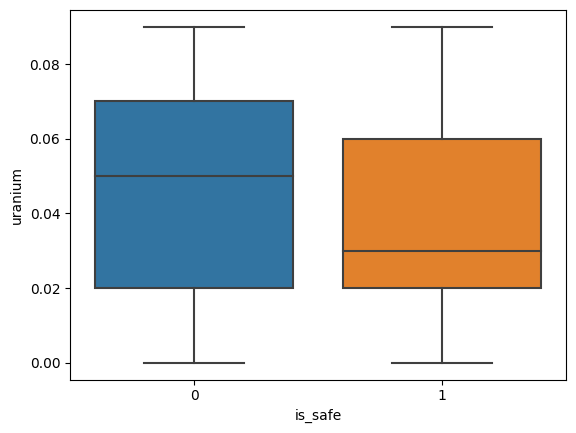

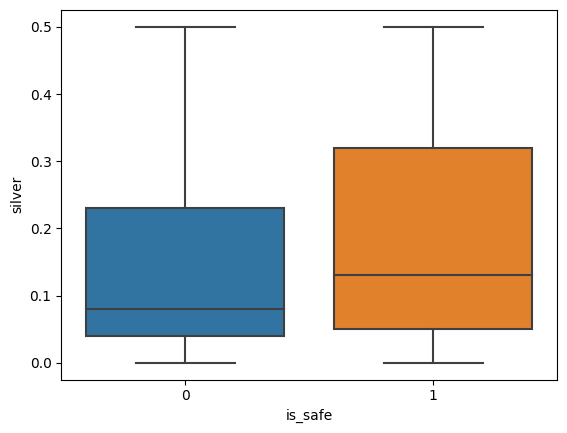

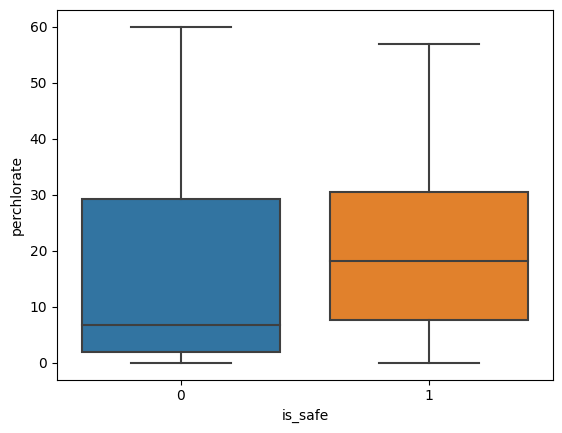

In [866]:
for feature in good_features:
    graphic = plt.figure()
    sns.boxplot(x='is_safe',y=feature,data=water)

## Train Test Split

In [867]:
X = water.drop(['is_safe'], axis = 1)
y = water['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Standardize the Variables

In [868]:
scaler = StandardScaler()

In [869]:
scaler = StandardScaler()

In [870]:
scaler.fit(X_train)

StandardScaler()

In [871]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

# K Nearest Neighbors

In [872]:
knn = KNeighborsClassifier(n_neighbors=5)

In [873]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [874]:
pred = knn.predict(scaled_X_test)

In [875]:
print(confusion_matrix(y_test,pred))

[[1378   40]
 [ 108   74]]


In [876]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1418
           1       0.65      0.41      0.50       182

    accuracy                           0.91      1600
   macro avg       0.79      0.69      0.72      1600
weighted avg       0.90      0.91      0.90      1600



In [877]:
print(accuracy_score(y_test,pred))

0.9075


## Finding best value of k

In [878]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

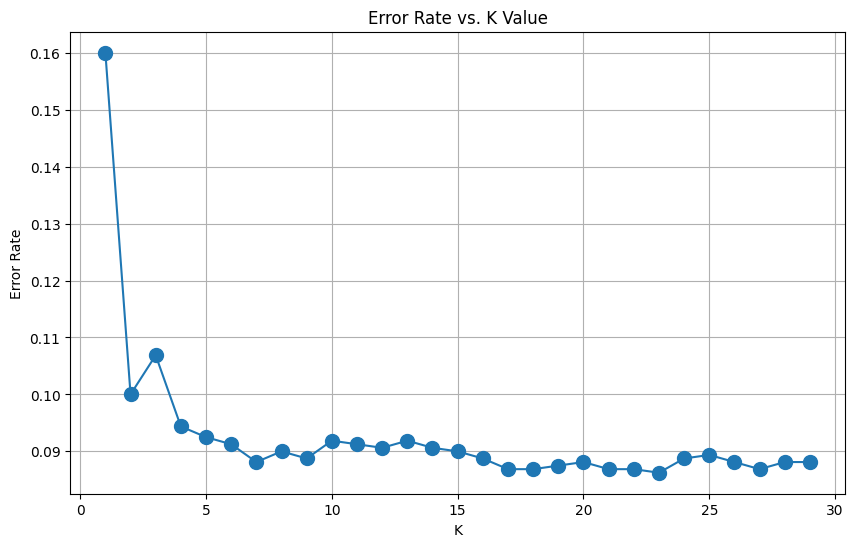

In [879]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [880]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[1385   33]
 [ 108   74]]

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1418
           1       0.69      0.41      0.51       182

    accuracy                           0.91      1600
   macro avg       0.81      0.69      0.73      1600
weighted avg       0.90      0.91      0.90      1600

0.911875


# Decision Tree

In [884]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [885]:
X = water.drop(['is_safe'], axis = 1)
y = water['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [886]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [887]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [888]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [889]:
y_pred = model.predict(X_test)

In [892]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1432
           1       0.88      0.54      0.67       168

    accuracy                           0.94      1600
   macro avg       0.92      0.77      0.82      1600
weighted avg       0.94      0.94      0.94      1600



In [893]:
print(confusion_matrix(y_test, y_pred))

[[1420   12]
 [  77   91]]


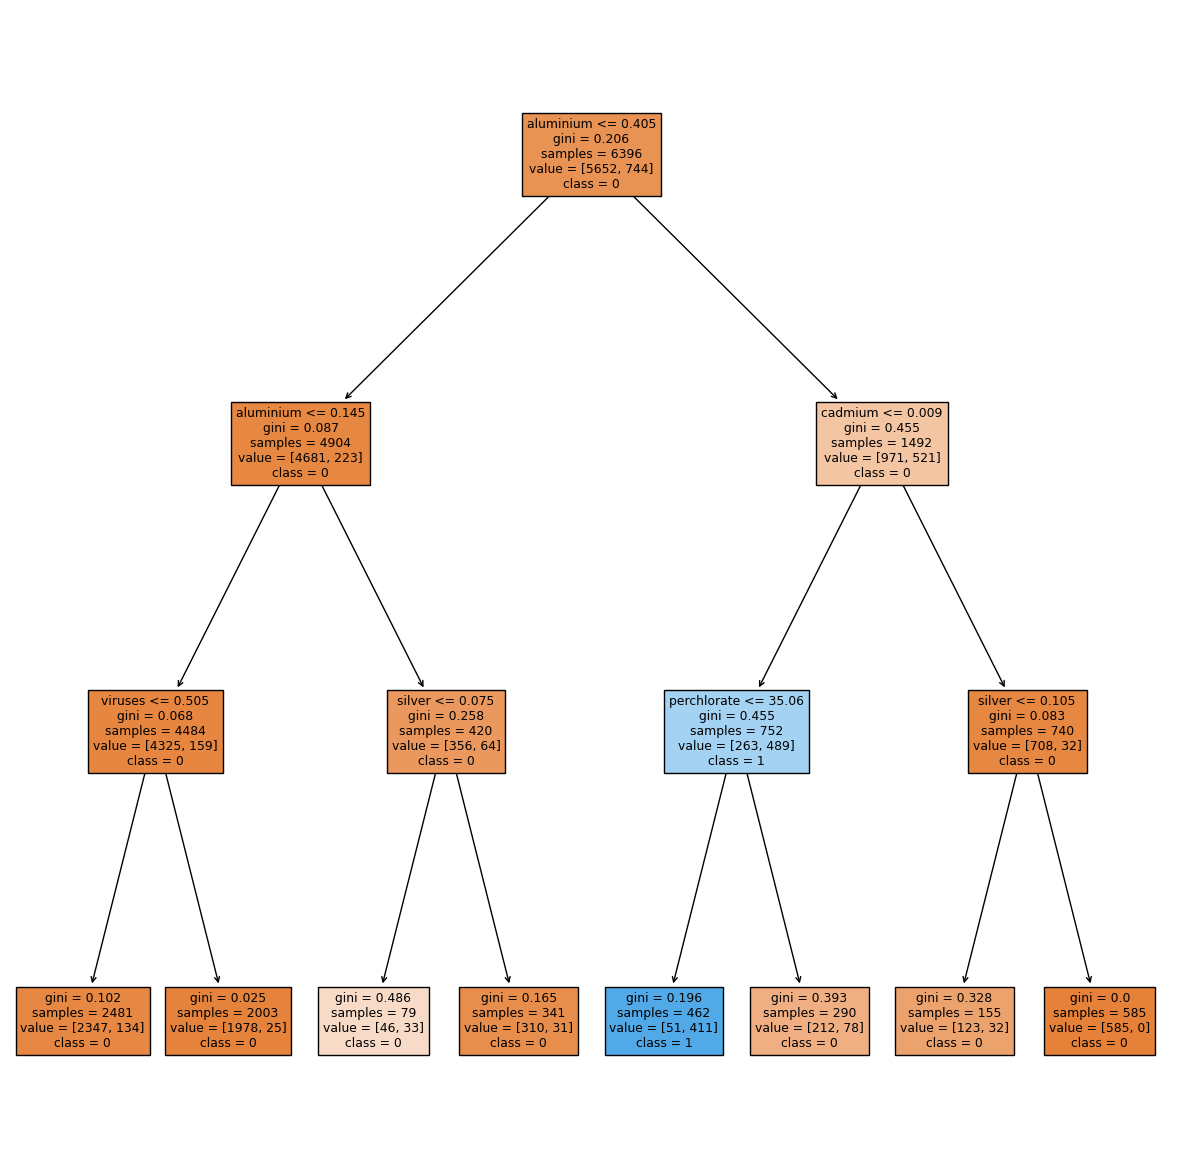

In [894]:
plt.figure(figsize = (15, 15))
plot_tree(model, feature_names = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'], 
          class_names = ['0', '1'], filled = True)
plt.show()

In [895]:
print(accuracy_score(y_test,y_pred))

0.944375


# Random Forest #

In [896]:
from sklearn.ensemble import RandomForestClassifier

In [897]:
rand_forest_model = RandomForestClassifier(n_estimators=15, max_depth=10)
rand_forest_model.fit(X_train, y_train)

y_pred = rand_forest_model.predict(X_test)

In [898]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1424    8]
 [  62  106]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1432
           1       0.93      0.63      0.75       168

    accuracy                           0.96      1600
   macro avg       0.94      0.81      0.86      1600
weighted avg       0.96      0.96      0.95      1600

0.95625


# SVM

In [899]:
X = water.drop(['is_safe'], axis = 1)
X = X[good_features]
y = water['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [900]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [901]:
model = SVC(C=1, gamma = 1, kernel = 'rbf')

In [902]:
model.fit(scaled_X_train,y_train)

SVC(C=1, gamma=1)

In [903]:
y_pred = model.predict(scaled_X_test)

In [904]:
print(confusion_matrix(y_test, y_pred))

[[2090   30]
 [ 164  115]]


In [905]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2120
           1       0.79      0.41      0.54       279

    accuracy                           0.92      2399
   macro avg       0.86      0.70      0.75      2399
weighted avg       0.91      0.92      0.91      2399



In [906]:
print(accuracy_score(y_test,y_pred))

0.9191329720716965


## GridSearch for SVM

In [907]:
from sklearn.model_selection import GridSearchCV

In [908]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [909]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [910]:
grid_predictions = grid.predict(scaled_X_test)

In [911]:
print(confusion_matrix(y_test,grid_predictions))

[[2079   41]
 [ 113  166]]


In [912]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2120
           1       0.80      0.59      0.68       279

    accuracy                           0.94      2399
   macro avg       0.88      0.79      0.82      2399
weighted avg       0.93      0.94      0.93      2399



In [913]:
print(accuracy_score(y_test,grid_predictions))

0.9358065860775323


# AdaBoost

In [914]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [915]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

In [916]:
print(confusion_matrix(y_test, y_pred))

[[2079   41]
 [ 134  145]]


In [917]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2120
           1       0.78      0.52      0.62       279

    accuracy                           0.93      2399
   macro avg       0.86      0.75      0.79      2399
weighted avg       0.92      0.93      0.92      2399



In [918]:
print(accuracy_score(y_test,y_pred))

0.9270529387244685
